In [1]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [146]:
import math
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
    fitness=np.zeros((len(p),1))
    for i in range(len(p)):
        x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
        v1 = 2*(math.exp(-x))*x*z
        v2 = 2*(math.pow(y,3))
        v3 = math.pow(y,2)
        v4 = 3*(math.pow(z,3))
        
        val = v1 - v2 + v3 - v4
        
        fitness[i,0] = val
    return fitness

In [50]:
def selection(pop, fitness, num_parents):
   
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = np.min(fitness)
   return parents

In [154]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [147]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [155]:
import numpy as np
from random import randint
import math

num_var = 3
sizeof_pop= 100
upper_limit = 10000
lower_limit = 0
num_parents = 4

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
Scores=[]
num_generations = 2000
for generation in range(num_generations):
   print("Generation : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   # print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(8*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   # print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:offspring_mutation.shape[0]+parents.shape[0], :] = offspring_mutation
   Scores.append(np.max(fitness_score))
print("Best result : ", np.max(fitness_score))

Generation :  0
(32,)
Generation :  1
(32,)
Generation :  2
(32,)
Generation :  3
(32,)
Generation :  4
(32,)
Generation :  5
(32,)
Generation :  6
(32,)
Generation :  7
(32,)
Generation :  8
(32,)
Generation :  9
(32,)
Generation :  10
(32,)
Generation :  11
(32,)
Generation :  12
(32,)
Generation :  13
(32,)
Generation :  14
(32,)
Generation :  15
(32,)
Generation :  16
(32,)
Generation :  17
(32,)
Generation :  18
(32,)
Generation :  19
(32,)
Generation :  20
(32,)
Generation :  21
(32,)
Generation :  22
(32,)
Generation :  23
(32,)
Generation :  24
(32,)
Generation :  25
(32,)
Generation :  26
(32,)
Generation :  27
(32,)
Generation :  28
(32,)
Generation :  29
(32,)
Generation :  30
(32,)
Generation :  31
(32,)
Generation :  32
(32,)
Generation :  33
(32,)
Generation :  34
(32,)
Generation :  35
(32,)
Generation :  36
(32,)
Generation :  37
(32,)
Generation :  38
(32,)
Generation :  39
(32,)
Generation :  40
(32,)
Generation :  41
(32,)
Generation :  42
(32,)
Generation :  43
(32,

KeyboardInterrupt: 

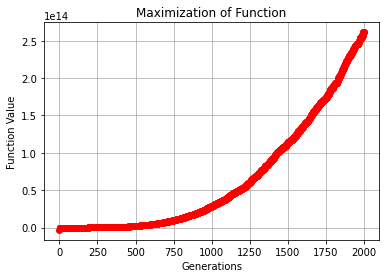

In [151]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()

## Plotting Individual Variables

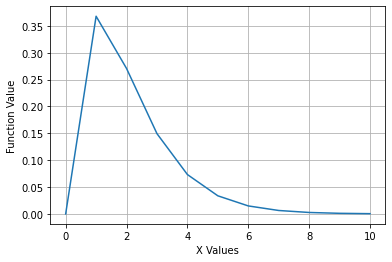

In [110]:
# plot for X value
import matplotlib.pyplot as plt
s_value =0
e_value = 10
xAxis = [x for x in range(s_value, e_value+1)]
yAxis = [x*math.exp(-x) for x in range(s_value, e_value+1)]
plt.plot(xAxis,yAxis)
plt.xlabel('X Values')
plt.ylabel('Function Value')
plt.grid(True)
plt.show()
# Max value of the function is 0.36787944117144233 at x = 1

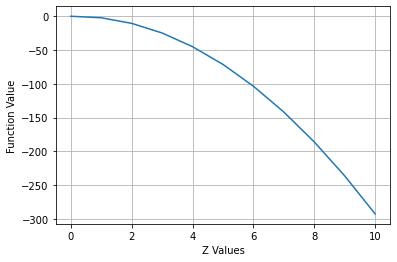

In [109]:
# plot for Z value
import matplotlib.pyplot as plt
s_value =0
e_value = 10
xAxis = [z for z in range(s_value, e_value+1)]
yAxis = [ z*(2*0.36788 - 3*z) for z in range(s_value, e_value+1)]
plt.plot(xAxis,yAxis)
plt.xlabel('Z Values')
plt.ylabel('Function Value')
plt.grid(True)
plt.show()
# Max value of the function is 0 at z = 0

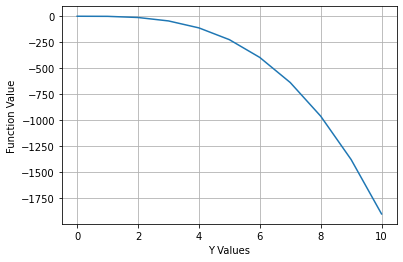

In [111]:
# plot for Y value
import matplotlib.pyplot as plt
s_value =0
e_value = 10
xAxis = [y for y in range(s_value, e_value+1)]
yAxis = [ math.pow(y,2)*(1-2*y) for y in range(s_value, e_value+1)]
plt.plot(xAxis,yAxis)
plt.xlabel('Y Values')
plt.ylabel('Function Value')
plt.grid(True)
plt.show()
# Max value of the function is 0 at y = 0